In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [40]:
df = pd.read_csv('/content/gdrive/MyDrive/datascience/dsa2021_mytsel.txt', sep='|')

In [41]:
df.head()

,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
0,465005,0,122418.0,198170.0,1088.0,122418.0,8340.0,2000.0,1,0.0,0,2078.0,7.0,664.0,NaN,NaN,3.282701e+10,109630.0,11120.0,75010.0,2,0.0,0,0.0,11.0,12338.0,1500.0,51.0,3.889084e+10,108670.0,9660.0,0.0,8.0,7818.0,0.0,10.0,3.060338e+10,LIMA PULUH KOTA,02.Sumbagteng,AREA 1
1,272500,0,76835.0,64167.0,126.0,76835.0,3485.0,73000.0,1,0.0,0,0.0,6.0,280.0,350.0,9.0,3.612966e+09,0.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,38015.0,0.0,NaN,NaN,NaN,NaN,NaN,9.510331e+09,KOTA MAKASSAR,12.Sulawesi,AREA 4
2,713785,0,180350.0,67658.0,349.0,180350.0,0.0,180000.0,3,10000.0,1,0.0,7.0,4329.0,350.0,1.0,4.202538e+10,104992.0,0.0,92000.0,2,0.0,0,12992.0,12.0,4669.0,NaN,NaN,2.632445e+10,222351.0,0.0,16336.0,53.0,23465.0,NaN,NaN,2.596587e+10,KOTA SERANG,04.Western Jabotabek,AREA 2
3,123273,0,342633.0,170983.4,804.0,342633.0,102633.0,160000.0,2,0.0,0,NaN,NaN,NaN,0.0,14.0,5.597585e+10,330353.6,4473.6,240010.0,5,10000.0,1,0.0,5.0,202.0,0.0,3.0,9.102049e+10,469236.0,12200.0,0.0,13.0,353.0,0.0,28.0,1.486116e+11,KERINCI,03.Sumbagsel,AREA 1
4,841937,0,191000.0,656710.0,946.0,191000.0,0.0,191000.0,1,0.0,0,NaN,NaN,NaN,NaN,NaN,9.382076e+10,431360.0,0.0,382000.0,2,0.0,0,23200.0,1.0,3478.0,NaN,NaN,1.043006e+11,399040.0,0.0,NaN,NaN,NaN,NaN,NaN,9.707688e+10,SUMEDANG,07.Jabar,AREA 2


In [42]:
df.shape

(1000000, 40)

In [43]:
df['mytsel_lapse'].value_counts()

0    707171
1    292829
Name: mytsel_lapse, dtype: int64

In [44]:
df.isnull().sum()

id                             0
mytsel_lapse                   0
arpu_30d_before                0
arpu_30d_after                 0
los                           66
m0_arpu_all                    0
m0_arpu_dls                    0
m0_mytsel_rev                  0
m0_mytsel_trx                  0
m0_mytsel_recharge             0
m0_mytsel_recharge_trx         0
m0_rev_voice              246393
m0_trx_voice              246393
m0_dur_voice              246393
m0_rev_sms                510345
m0_trx_sms                510345
m0_vol_broadband           28091
m1_arpu_all                    0
m1_arpu_dls                    0
m1_mytsel_rev                  0
m1_mytsel_trx                  0
m1_mytsel_recharge             0
m1_mytsel_recharge_trx         0
m1_rev_voice              277737
m1_trx_voice              277737
m1_dur_voice              277737
m1_rev_sms                519929
m1_trx_sms                519929
m1_vol_broadband           64913
m2_arpu_all                    0
m2_arpu_dl

### Handling Missing Value & Negative Value

In [45]:
# Handling Missing Value
df.dropna(subset=['los','city'],axis=0, inplace=True)
df.fillna(0, inplace=True)

#Drop Arpu Negative
df.drop(index=df[df['m0_arpu_dls'] < 0].index, axis=0, inplace=True)
df.drop(index=df[df['m1_arpu_dls'] < 0].index, axis=0, inplace=True)
df.drop(index=df[df['m2_arpu_dls'] < 0].index, axis=0, inplace=True)

In [46]:
df.isnull().sum()

id                        0
mytsel_lapse              0
arpu_30d_before           0
arpu_30d_after            0
los                       0
m0_arpu_all               0
m0_arpu_dls               0
m0_mytsel_rev             0
m0_mytsel_trx             0
m0_mytsel_recharge        0
m0_mytsel_recharge_trx    0
m0_rev_voice              0
m0_trx_voice              0
m0_dur_voice              0
m0_rev_sms                0
m0_trx_sms                0
m0_vol_broadband          0
m1_arpu_all               0
m1_arpu_dls               0
m1_mytsel_rev             0
m1_mytsel_trx             0
m1_mytsel_recharge        0
m1_mytsel_recharge_trx    0
m1_rev_voice              0
m1_trx_voice              0
m1_dur_voice              0
m1_rev_sms                0
m1_trx_sms                0
m1_vol_broadband          0
m2_arpu_all               0
m2_arpu_dls               0
m2_rev_voice              0
m2_trx_voice              0
m2_dur_voice              0
m2_rev_sms                0
m2_trx_sms          

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999698 entries, 0 to 999999
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      999698 non-null  int64  
 1   mytsel_lapse            999698 non-null  int64  
 2   arpu_30d_before         999698 non-null  float64
 3   arpu_30d_after          999698 non-null  float64
 4   los                     999698 non-null  float64
 5   m0_arpu_all             999698 non-null  float64
 6   m0_arpu_dls             999698 non-null  float64
 7   m0_mytsel_rev           999698 non-null  float64
 8   m0_mytsel_trx           999698 non-null  int64  
 9   m0_mytsel_recharge      999698 non-null  float64
 10  m0_mytsel_recharge_trx  999698 non-null  int64  
 11  m0_rev_voice            999698 non-null  float64
 12  m0_trx_voice            999698 non-null  float64
 13  m0_dur_voice            999698 non-null  float64
 14  m0_rev_sms          

In [48]:
Categorical = ['city', 'region', 'area']
numerical = [
    'los', 'm0_arpu_all', 'm0_arpu_dls', 'm0_mytsel_rev', 'm0_mytsel_trx',
    'm0_mytsel_recharge', 'm0_mytsel_recharge_trx', 'm0_rev_voice',
    'm0_trx_voice', 'm0_dur_voice', 'm0_rev_sms', 'm0_trx_sms',
    'm0_vol_broadband', 'm1_arpu_all', 'm1_arpu_dls', 'm1_mytsel_rev',
    'm1_mytsel_trx', 'm1_mytsel_recharge', 'm1_mytsel_recharge_trx',
    'm1_rev_voice', 'm1_trx_voice', 'm1_dur_voice', 'm1_rev_sms',
    'm1_trx_sms', 'm1_vol_broadband', 'm2_arpu_all', 'm2_arpu_dls',
    'm2_rev_voice', 'm2_trx_voice', 'm2_dur_voice', 'm2_rev_sms',
    'm2_trx_sms', 'm2_vol_broadband'
]

In [12]:
df.drop(['id','arpu_30d_before','arpu_30d_after'], axis=1, inplace=True)

In [13]:
# Encode categorical feature
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in Categorical:
    df[i] = LE.fit_transform(df[i])

In [14]:
# logarithmic all data numeric
for i in numerical:
    df[i] = np.log(df[i]+1)
    
df.head()

,mytsel_lapse,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
0,0,6.993015,11.715205,9.028938,7.601402,0.693147,0.00000,0.000000,7.639642,2.079442,6.499787,0.000000,0.000000,24.214518,11.604875,9.316590,11.225390,1.098612,0.00000,0.000000,0.000000,2.484907,9.420520,7.313887,3.951244,24.384025,11.596080,9.175852,0.000000,2.197225,8.964312,0.0,2.397895,24.144376,299,1,0
1,0,4.844187,11.249429,8.156510,11.198228,0.693147,0.00000,0.000000,0.000000,1.945910,5.638355,5.860786,2.302585,22.007795,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.545762,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,22.975645,217,11,3
2,0,5.857933,12.102660,0.000000,12.100718,1.386294,9.21044,0.693147,0.000000,2.079442,8.373323,5.860786,0.693147,24.461540,11.561649,0.000000,11.429555,1.098612,0.00000,0.000000,9.472166,2.564949,8.448914,0.000000,0.000000,23.993764,12.312017,0.000000,9.701188,3.988984,10.063308,0.0,0.000000,23.980049,248,3,1
3,0,6.690842,12.744418,11.538925,11.982935,1.098612,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,24.748186,12.707922,8.406172,12.388440,1.791759,9.21044,0.693147,0.000000,1.791759,5.313206,0.000000,1.386294,25.234350,13.058863,9.409273,0.000000,2.639057,5.869297,0.0,3.367296,25.724602,167,2,0
4,0,6.853299,12.160034,0.000000,12.160034,0.693147,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.264652,12.974701,0.000000,12.853179,1.098612,0.00000,0.000000,10.051951,0.693147,8.154500,0.000000,0.000000,25.370543,12.896819,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,25.298769,473,6,1


In [15]:
df.shape

(999698, 37)

In [16]:
# Duplikasi data setelah encode categorical feature
data = df.copy()

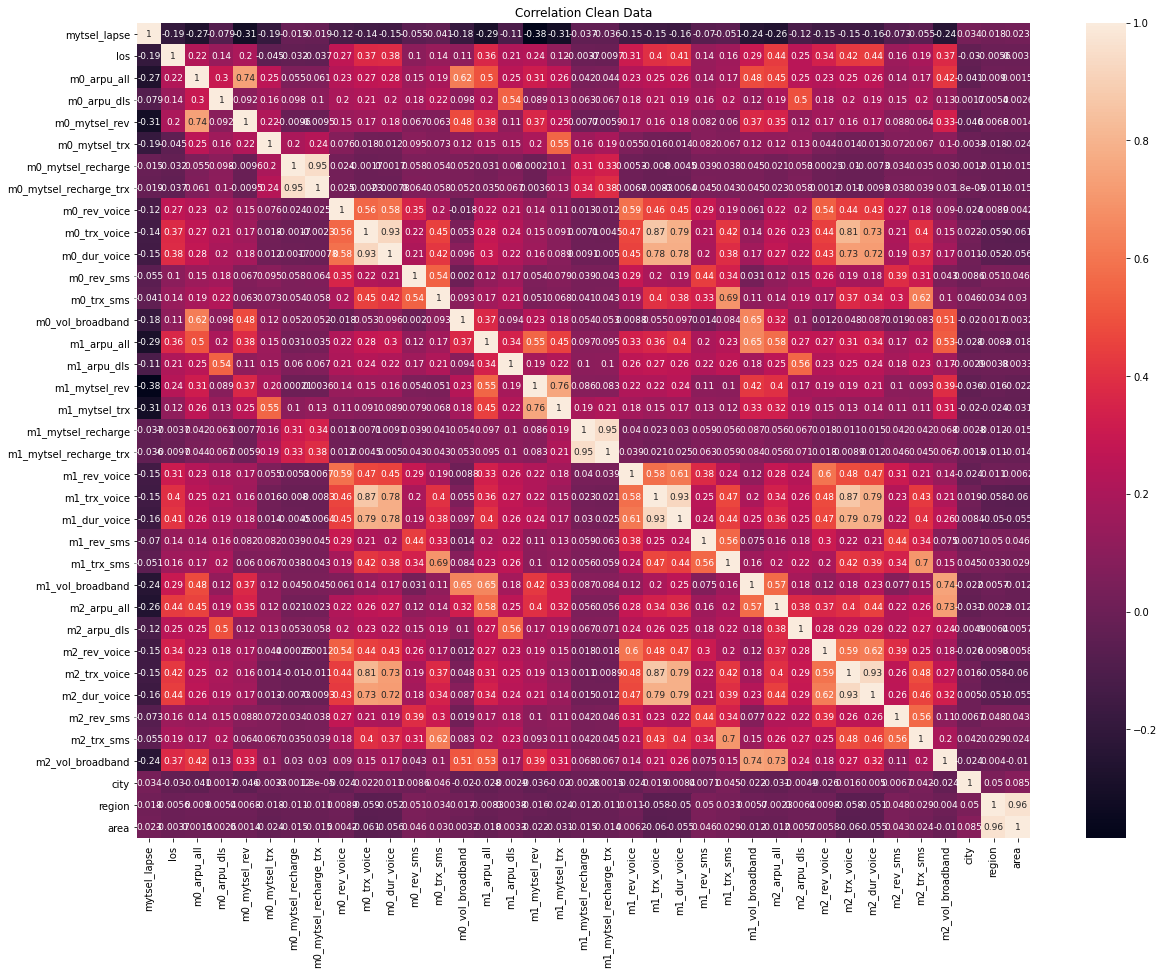

In [18]:
# corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, annot_kws={'size':9})
plt.title('Correlation Clean Data')
plt.show()

In [19]:
corr['mytsel_lapse'].sort_values()

m1_mytsel_rev            -0.384478
m0_mytsel_rev            -0.310287
m1_mytsel_trx            -0.309262
m1_arpu_all              -0.290406
m0_arpu_all              -0.268653
m2_arpu_all              -0.259633
m1_vol_broadband         -0.241111
m2_vol_broadband         -0.235904
los                      -0.194162
m0_mytsel_trx            -0.189020
m0_vol_broadband         -0.181428
m1_dur_voice             -0.162234
m2_dur_voice             -0.158935
m1_trx_voice             -0.150777
m2_rev_voice             -0.147238
m2_trx_voice             -0.146670
m0_dur_voice             -0.146327
m1_rev_voice             -0.145860
m0_trx_voice             -0.140386
m0_rev_voice             -0.123177
m2_arpu_dls              -0.119167
m1_arpu_dls              -0.110335
m0_arpu_dls              -0.079041
m2_rev_sms               -0.072525
m1_rev_sms               -0.070354
m0_rev_sms               -0.055485
m2_trx_sms               -0.054955
m1_trx_sms               -0.051454
m0_trx_sms          

# Feature Engineering

In [20]:
# add feature arpu_next
data['arpu_all'] = (data.loc[:,'m0_arpu_all']+data.loc[:,'m1_arpu_all']+data.loc[:,'m2_arpu_all'])
data['delta_arpu0'] = data.loc[:,'m0_arpu_all'] - data.loc[:,'m1_arpu_all']
data['delta_arpu1'] = data.loc[:,'m1_arpu_all'] - data.loc[:,'m2_arpu_all']

In [21]:
# add feature mytsel_rev
data['mytsel_rev'] = data.loc[:,'m0_mytsel_rev']+data.loc[:,'m1_mytsel_rev']
data['delta_mytsel'] = data.loc[:,'m0_mytsel_rev']-data.loc[:,'m1_mytsel_rev']

In [22]:
# add feature vol broadband
data['bb_vol'] = (data.loc[:,'m0_vol_broadband']+data.loc[:,'m1_vol_broadband']+data.loc[:,'m2_vol_broadband'])
data['delta_bb0'] = data.loc[:,'m0_vol_broadband'] - data.loc[:,'m1_vol_broadband']
data['delta_bb1'] = data.loc[:,'m1_vol_broadband'] - data.loc[:,'m2_vol_broadband']

In [23]:
# add feature mytsel_trx
data['mytsel_trx'] = data.loc[:,'m0_mytsel_trx'] + data.loc[:,'m1_mytsel_trx']
data['delta_mytsel_trx'] = data.loc[:,'m0_mytsel_trx'] - data.loc[:,'m1_mytsel_trx']

In [24]:
# add feature voice
data['voice_rev'] = data.loc[:,'m0_rev_voice'] + data.loc[:,'m1_rev_voice'] + data.loc[:,'m2_rev_voice']
data['voice_dur'] = data.loc[:,'m0_dur_voice'] + data.loc[:,'m1_dur_voice'] + data.loc[:,'m2_dur_voice']
data['voice_trx'] = data.loc[:,'m0_dur_voice'] + data.loc[:,'m1_dur_voice'] + data.loc[:,'m2_dur_voice']
data['delta_rev0'] = data.loc[:,'m0_rev_voice'] - data.loc[:,'m1_rev_voice']
data['delta_rev1'] = data.loc[:,'m1_rev_voice'] - data.loc[:,'m2_rev_voice']
data['delta_dur0'] = data.loc[:,'m0_dur_voice'] - data.loc[:,'m1_dur_voice']
data['delta_dur1'] = data.loc[:,'m1_dur_voice'] - data.loc[:,'m2_dur_voice']
data['delta_trx0'] = data.loc[:,'m0_dur_voice'] - data.loc[:,'m1_dur_voice']
data['delta_trx1'] = data.loc[:,'m1_dur_voice'] - data.loc[:,'m2_dur_voice']

In [25]:
# add feature arpu dls
data['arpu_dls'] = data.loc[:,'m0_arpu_dls'] + data.loc[:,'m1_arpu_dls'] + data.loc[:,'m2_arpu_dls']
data['delta_dls0'] = data.loc[:,'m0_arpu_dls'] - data.loc[:,'m1_arpu_dls']
data['delta_dls1'] = data.loc[:,'m1_arpu_dls'] - data.loc[:,'m2_arpu_dls']

In [26]:
data.head()

,mytsel_lapse,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area,arpu_all,delta_arpu0,delta_arpu1,mytsel_rev,delta_mytsel,bb_vol,delta_bb0,delta_bb1,mytsel_trx,delta_mytsel_trx,voice_rev,voice_dur,voice_trx,delta_rev0,delta_rev1,delta_dur0,delta_dur1,delta_trx0,delta_trx1,arpu_dls,delta_dls0,delta_dls1
0,0,6.993015,11.715205,9.028938,7.601402,0.693147,0.00000,0.000000,7.639642,2.079442,6.499787,0.000000,0.000000,24.214518,11.604875,9.316590,11.225390,1.098612,0.00000,0.000000,0.000000,2.484907,9.420520,7.313887,3.951244,24.384025,11.596080,9.175852,0.000000,2.197225,8.964312,0.0,2.397895,24.144376,299,1,0,34.916161,0.110329,0.008795,18.826792,-3.623988,72.742919,-0.169507,0.239648,1.791759,-0.405465,7.639642,24.884619,24.884619,7.639642,0.000000,-2.920733,0.456208,-2.920733,0.456208,27.521381,-0.287652,0.140738
1,0,4.844187,11.249429,8.156510,11.198228,0.693147,0.00000,0.000000,0.000000,1.945910,5.638355,5.860786,2.302585,22.007795,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.545762,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,22.975645,217,11,3,21.795191,11.249429,-10.545762,11.198228,11.198228,44.983439,22.007795,-22.975645,0.693147,0.693147,0.000000,5.638355,5.638355,0.000000,0.000000,5.638355,0.000000,5.638355,0.000000,8.156510,8.156510,0.000000
2,0,5.857933,12.102660,0.000000,12.100718,1.386294,9.21044,0.693147,0.000000,2.079442,8.373323,5.860786,0.693147,24.461540,11.561649,0.000000,11.429555,1.098612,0.00000,0.000000,9.472166,2.564949,8.448914,0.000000,0.000000,23.993764,12.312017,0.000000,9.701188,3.988984,10.063308,0.0,0.000000,23.980049,248,3,1,35.976326,0.541011,-0.750368,23.530272,0.671163,72.435352,0.467775,0.013715,2.484907,0.287682,19.173354,26.885545,26.885545,-9.472166,-0.229022,-0.075592,-1.614393,-0.075592,-1.614393,0.000000,0.000000,0.000000
3,0,6.690842,12.744418,11.538925,11.982935,1.098612,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,24.748186,12.707922,8.406172,12.388440,1.791759,9.21044,0.693147,0.000000,1.791759,5.313206,0.000000,1.386294,25.234350,13.058863,9.409273,0.000000,2.639057,5.869297,0.0,3.367296,25.724602,167,2,0,38.511203,0.036496,-0.350941,24.371375,-0.405505,75.707139,-0.486164,-0.490252,2.890372,-0.693147,0.000000,11.182503,11.182503,0.000000,0.000000,-5.313206,-0.556091,-5.313206,-0.556091,29.354370,3.132752,-1.003101
4,0,6.853299,12.160034,0.000000,12.160034,0.693147,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.264652,12.974701,0.000000,12.853179,1.098612,0.00000,0.000000,10.051951,0.693147,8.154500,0.000000,0.000000,25.370543,12.896819,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,25.298769,473,6,1,38.031554,-0.814667,0.077881,25.013212,-0.693145,75.933964,-0.105891,0.071773,1.791759,-0.405465,10.051951,8.154500,8.154500,-10.051951,10.051951,-8.154500,8.154500,-8.154500,8.154500,0.000000,0.000000,0.000000


# Feature Selection : (using Correlation with target)
* Correlation with Target < 0.1 will be drop

In [27]:
feat_corr = data.corr()

In [28]:
# Selected Feature based on correlation with labels ('mytsel_lapse')
for col in feat_corr['mytsel_lapse'].index[1:]:
    # Pick desired cutoff for dropping features. In absolute-value terms.
    if np.absolute(feat_corr.loc['mytsel_lapse',col]) < 0.1:
        # Drop the feature if correlation is below cutoff
        data.drop(columns=col, inplace=True)

print('-'*40)
print('\nData shape after feature selection:', data.shape)
print('\nCounts of lapse VS non-lapse in new data:')
print(data['mytsel_lapse'].value_counts())
print('-'*40)

----------------------------------------

Data shape after feature selection: (999698, 35)

Counts of lapse VS non-lapse in new data:
0    707062
1    292636
Name: mytsel_lapse, dtype: int64
----------------------------------------


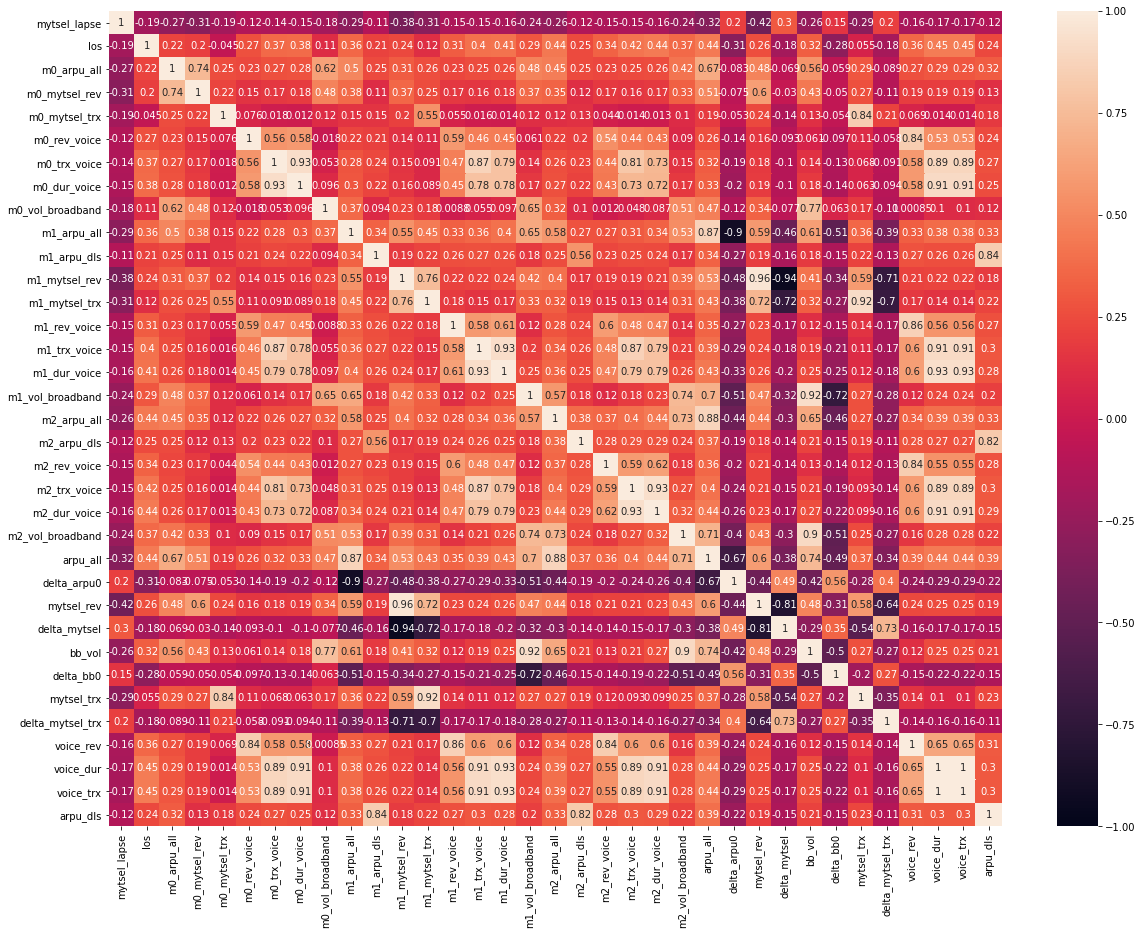

In [ ]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

# Delete feature that already be re-engineering

In [29]:
data_reeng = data.drop(['m0_arpu_all', 'm0_mytsel_rev', 'm0_mytsel_trx',
       'm0_rev_voice', 'm0_trx_voice', 'm0_dur_voice', 'm0_vol_broadband',
       'm1_arpu_all', 'm1_arpu_dls', 'm1_mytsel_rev', 'm1_mytsel_trx',
       'm1_rev_voice', 'm1_trx_voice', 'm1_dur_voice', 'm1_vol_broadband',
       'm2_arpu_all', 'm2_arpu_dls', 'm2_rev_voice', 'm2_trx_voice',
       'm2_dur_voice', 'm2_vol_broadband'], axis=1)

In [30]:
data_reeng.corr()['mytsel_lapse']

mytsel_lapse        1.000000
los                -0.194162
arpu_all           -0.324981
delta_arpu0         0.201962
mytsel_rev         -0.419350
delta_mytsel        0.300025
bb_vol             -0.255907
delta_bb0           0.150403
mytsel_trx         -0.292361
delta_mytsel_trx    0.200174
voice_rev          -0.164055
voice_dur          -0.169865
voice_trx          -0.169865
arpu_dls           -0.123980
Name: mytsel_lapse, dtype: float64

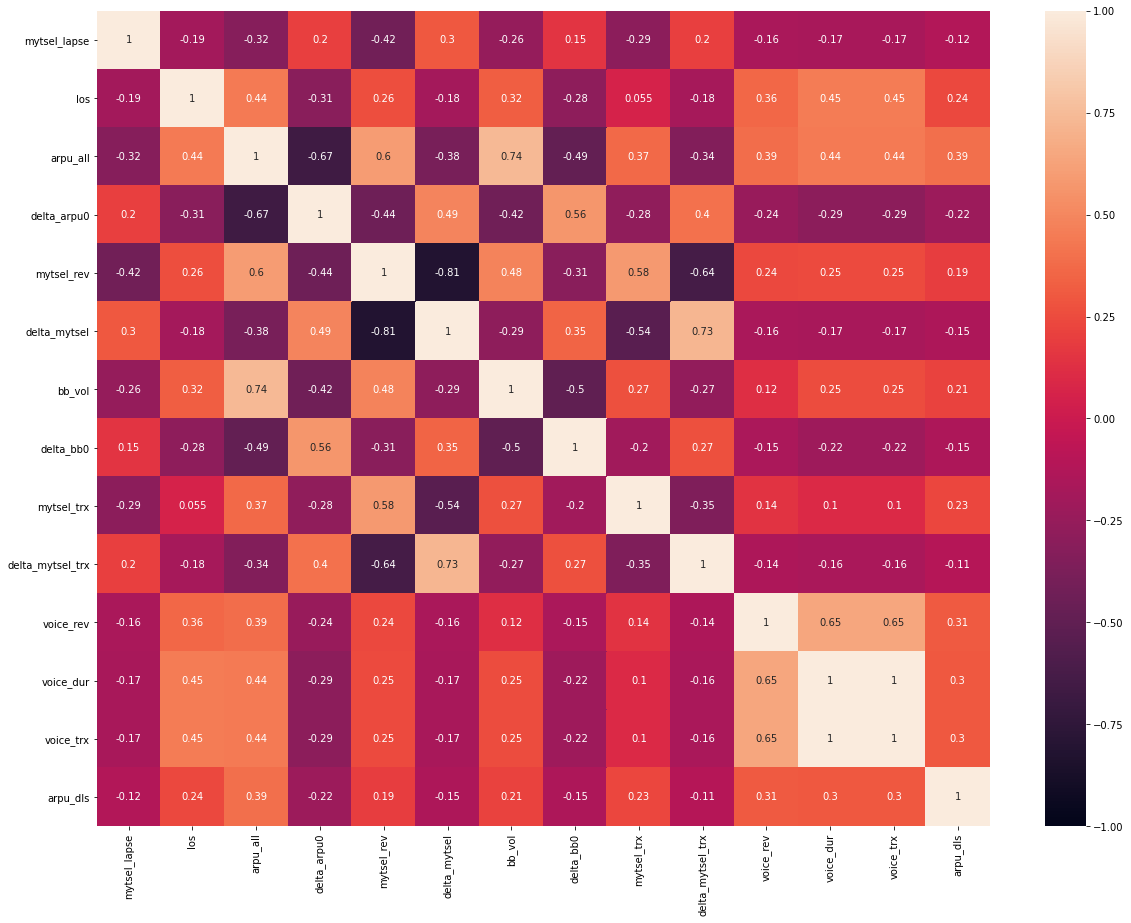

In [ ]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(data_reeng.corr(), annot=True, vmin=-1, vmax=1)

In [31]:
X = data_reeng.drop('mytsel_lapse', axis=1)
y = data_reeng['mytsel_lapse']

# Splitting Data for Train and Test 
* Data without clearing Outlier

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

roc_auc = make_scorer(roc_auc_score)

# Baseline Modelling

[0.65459555 0.65475031 0.65356984 0.65546525 0.65502141]
Naive Bayes ROC_AUC Score: 0.6546804697617087


Clgassification report:

              precision    recall  f1-score   support

           0       0.79      0.85      0.82    212391
           1       0.56      0.46      0.50     87519

    accuracy                           0.74    299910
   macro avg       0.68      0.65      0.66    299910
weighted avg       0.72      0.74      0.73    299910




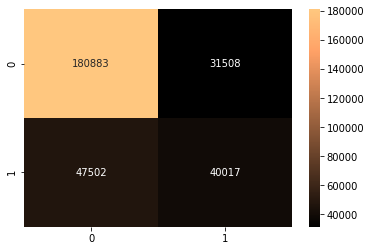

Time elapsed (hh:mm:ss.ms) 0:00:02.583583


In [ ]:
# Naive Bayes as a baseline for my classification tasks 
start_time = datetime.now() 
gnb = GaussianNB()

cv = cross_val_score(gnb,X_train,y_train, scoring=roc_auc,cv=5)
print(cv)
print('Naive Bayes ROC_AUC Score:', cv.mean())
print()
gnb_pred = gnb.fit(X_train,y_train).predict(X_test)

# Classification report
print('\nClgassification report:\n')
print(classification_report(y_test, gnb_pred))
print()

# Confusion matrix
conf_matrix = confusion_matrix(y_test,gnb_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

[0.65433442 0.65364117 0.65324219 0.6548643  0.65412232]
Logistic Regression ROC_AUC Score : 0.6540408799161682


Classification report:

              precision    recall  f1-score   support

           0       0.79      0.91      0.84    212391
           1       0.64      0.40      0.49     87519

    accuracy                           0.76    299910
   macro avg       0.71      0.65      0.67    299910
weighted avg       0.74      0.76      0.74    299910




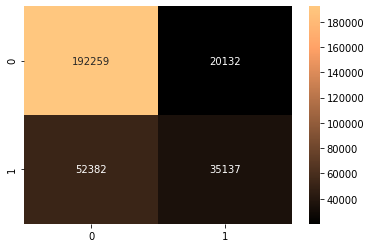

Time elapsed (hh:mm:ss.ms) 0:03:40.129721


In [ ]:
# LogisticRegression
start_time = datetime.now() 
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,scoring=roc_auc, cv=5)
print(cv)
print('Logistic Regression ROC_AUC Score :' , cv.mean())
print()

lr_pred = lr.fit(X_train,y_train).predict(X_test)

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, lr_pred))
print()

# Confusion matrix
conf_matrix = confusion_matrix(y_test,lr_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

[0.62120799 0.62145968 0.62339753 0.62165924 0.62177463]
Decision Tree Classification ROC_AUC Score :  0.6218998128258271


Classification report:

              precision    recall  f1-score   support

           0       0.78      0.77      0.78    212391
           1       0.46      0.48      0.47     87519

    accuracy                           0.68    299910
   macro avg       0.62      0.62      0.62    299910
weighted avg       0.69      0.68      0.69    299910




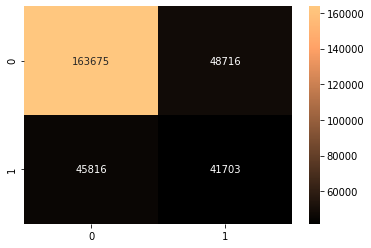

Time elapsed (hh:mm:ss.ms) 0:01:50.983101


In [ ]:
# DecisionTreeClassifier
start_time = datetime.now() 
dt = DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt,X_train,y_train,scoring=roc_auc, cv=5)
print(cv_dt)
print('Decision Tree Classification ROC_AUC Score : ', cv_dt.mean())
print()

dt_pred = dt.fit(X_train,y_train).predict(X_test)

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, dt_pred))
print()

# Confusion matrix
conf_matrix = confusion_matrix(y_test,dt_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

[0.6695585  0.66934552 0.66690733 0.66904641 0.66835674]
Random Forest ROC_AUC Score :  0.6686428987868946


Classification report:

              precision    recall  f1-score   support

           0       0.79      0.91      0.85    212391
           1       0.65      0.43      0.52     87519

    accuracy                           0.77    299910
   macro avg       0.72      0.67      0.68    299910
weighted avg       0.75      0.77      0.75    299910




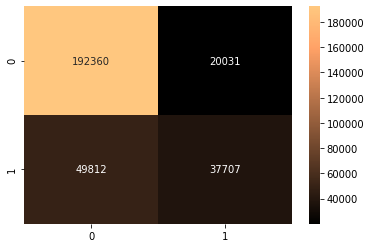

Time elapsed (hh:mm:ss.ms) 0:33:22.592305


In [ ]:
# RandomForestClassidier
start_time = datetime.now() 
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,scoring=roc_auc, cv=5)
print(cv)
print('Random Forest ROC_AUC Score : ', cv.mean())
print()

rf_pred = rf.fit(X_train,y_train).predict(X_test)

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, rf_pred))
print()

# Confusion matrix
conf_matrix = confusion_matrix(y_test,rf_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

[0.66686059 0.66930678 0.66460051 0.66824748 0.66923764]
AdaBoost ROC_AUC Score :  0.6676506001527228

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.89      0.84    212391
           1       0.63      0.45      0.52     87519

    accuracy                           0.76    299910
   macro avg       0.71      0.67      0.68    299910
weighted avg       0.75      0.76      0.75    299910




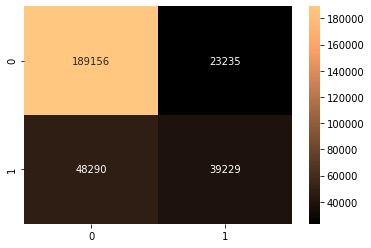

Time elapsed (hh:mm:ss.ms) 0:06:48.029712


In [ ]:
# AdaBoostClassifier
start_time = datetime.now() 

adc = AdaBoostClassifier(random_state = 1)
cv_adc = cross_val_score(adc,X_train,y_train,scoring=roc_auc, cv=5)
print(cv_adc)
print('AdaBoost ROC_AUC Score : ', cv_adc.mean())


adc_pred = adc.fit(X_train,y_train).predict(X_test)

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, adc_pred))
print()

# Confusion matrix
conf_matrix = confusion_matrix(y_test,adc_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

[0.67058698 0.66968391 0.66642702 0.67069649 0.67059599]
XGBoost Classifier ROC_AUC Score :  0.6695980794945159

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.90      0.84    212391
           1       0.64      0.44      0.52     87519

    accuracy                           0.77    299910
   macro avg       0.72      0.67      0.68    299910
weighted avg       0.75      0.77      0.75    299910




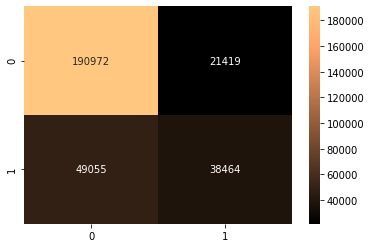

Time elapsed (hh:mm:ss.ms) 0:06:13.255050


In [ ]:
# XGBoost Classifier
start_time = datetime.now() 

xgb = XGBClassifier(random_state=1)
cv_xgb = cross_val_score(xgb,X_train,y_train,scoring=roc_auc, cv=5)
print(cv_xgb)
print('XGBoost Classifier ROC_AUC Score : ', cv_xgb.mean())


xgb_pred = xgb.fit(X_train,y_train).predict(X_test)

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, xgb_pred))
print()

# Confusion matrix
conf_matrix = confusion_matrix(y_test,xgb_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

# Model Selection & Handling Outlier
* Handling Outlier using 1.5*IQR
* lower Q1 - 1.5*IQR (less than lower will be drop)
* upper Q3 + 1.5*IQR (higher than upper will be drop)

In [34]:
# Menghilangkan Data Outlier 
no_outliers=data_reeng.copy()

In [35]:
# Removing Outliers from high-correlation features
new_corr = data_reeng.corr()
cols = new_corr['mytsel_lapse'].index[1:]

# For each feature correlated with Class...
for col in cols:
    # If absolute correlation value is more than X percent...
    correlation = new_corr.loc['mytsel_lapse',col]
    if np.absolute(correlation) > 0.1:
        
        # Separate the classes of the high-correlation column
        nonlapse = no_outliers.loc[no_outliers['mytsel_lapse']==0,col]
        lapse = no_outliers.loc[no_outliers['mytsel_lapse']==1,col]

        # Identify the 25th and 75th quartiles
        all_values = no_outliers.loc[:,col]
        q25, q75 = np.percentile(all_values, 25), np.percentile(all_values, 75)
        # Get the inter quartile range
        iqr = q75 - q25
        # Smaller cutoffs will remove more outliers
        cutoff = iqr * 1.5
        # Set the bounds of the desired portion to keep
        lower, upper = q25 - cutoff, q75 + cutoff
        
        # If positively correlated...
        # Drop nonlapse above upper bound, and lapse below lower bound
        if correlation > 0: 
            no_outliers.drop(index=nonlapse[nonlapse>upper].index,inplace=True)
            no_outliers.drop(index=lapse[lapse<lower].index,inplace=True)
        
        # If negatively correlated...
        # Drop nonlapse below lower bound, and lapse above upper bound
        elif correlation < 0: 
            no_outliers.drop(index=nonlapse[nonlapse<lower].index,inplace=True)
            no_outliers.drop(index=lapse[lapse>upper].index,inplace=True)
        
print('\nData shape before removing outliers:', data_reeng.shape)
print('\nCounts of lapse VS non-lapse in previous data:')
print(data_reeng['mytsel_lapse'].value_counts())
print('-'*40)
print('-'*40)
print('\nData shape after removing outliers:', no_outliers.shape)
print('\nCounts of lapse VS non-lapse in new data:')
print(no_outliers['mytsel_lapse'].value_counts())


Data shape before removing outliers: (999698, 14)

Counts of lapse VS non-lapse in previous data:
0    707062
1    292636
Name: mytsel_lapse, dtype: int64
----------------------------------------
----------------------------------------

Data shape after removing outliers: (767306, 14)

Counts of lapse VS non-lapse in new data:
0    515078
1    252228
Name: mytsel_lapse, dtype: int64


In [ ]:
# Splitting feature independence and Target
X1 = no_outliers.drop('mytsel_lapse', axis=1)
y1 = no_outliers['mytsel_lapse']

In [ ]:
# Splitting data train and test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [56]:
no_outliers.

,mytsel_lapse,los,arpu_all,delta_arpu0,mytsel_rev,delta_mytsel,bb_vol,delta_bb0,mytsel_trx,delta_mytsel_trx,voice_rev,voice_dur,voice_trx,arpu_dls
0,0,6.993015,34.916161,0.110329,18.826792,-3.623988,72.742919,-0.169507,1.791759,-0.405465,7.639642,24.884619,24.884619,27.521381
2,0,5.857933,35.976326,0.541011,23.530272,0.671163,72.435352,0.467775,2.484907,0.287682,19.173354,26.885545,26.885545,0.000000
3,0,6.690842,38.511203,0.036496,24.371375,-0.405505,75.707139,-0.486164,2.890372,-0.693147,0.000000,11.182503,11.182503,29.354370
4,0,6.853299,38.031554,-0.814667,25.013212,-0.693145,75.933964,-0.105891,1.791759,-0.405465,10.051951,8.154500,8.154500,0.000000
5,1,7.315884,33.522560,0.396968,10.571343,10.571343,68.015896,0.325026,0.693147,0.693147,31.842613,26.435435,26.435435,0.000000
6,0,7.311886,37.515261,-0.164549,11.506314,6.710523,72.373859,-0.877824,2.639057,1.252763,17.424244,23.906958,23.906958,28.910551
7,1,7.558517,33.028914,1.068597,22.025059,0.882374,66.060826,0.910553,2.484907,1.098612,9.696463,6.949856,6.949856,18.432374
9,1,3.465736,21.290917,0.810926,8.517393,8.517393,23.799972,23.799972,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000
10,0,6.655440,33.747063,0.199055,22.069551,-0.032260,60.731167,0.244493,1.386294,0.000000,26.081483,17.120922,17.120922,0.000000
11,0,7.482119,33.675770,0.000000,22.450513,0.000000,68.317535,-0.266876,1.386294,0.000000,0.000000,28.400879,28.400879,0.000000


In [57]:
ilist = no_outliers.index.tolist()

In [62]:
len(ilist)

767306

In [55]:
df.head(10)

,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
0,465005,0,122418.0,198170.0,1088.0,122418.0,8340.0,2000.0,1,0.0,0,2078.0,7.0,664.0,0.0,0.0,3.282701e+10,109630.0,11120.0,75010.0,2,0.0,0,0.0,11.0,12338.0,1500.0,51.0,3.889084e+10,108670.0,9660.0,0.0,8.0,7818.0,0.0,10.0,3.060338e+10,LIMA PULUH KOTA,02.Sumbagteng,AREA 1
1,272500,0,76835.0,64167.0,126.0,76835.0,3485.0,73000.0,1,0.0,0,0.0,6.0,280.0,350.0,9.0,3.612966e+09,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,38015.0,0.0,0.0,0.0,0.0,0.0,0.0,9.510331e+09,KOTA MAKASSAR,12.Sulawesi,AREA 4
2,713785,0,180350.0,67658.0,349.0,180350.0,0.0,180000.0,3,10000.0,1,0.0,7.0,4329.0,350.0,1.0,4.202538e+10,104992.0,0.0,92000.0,2,0.0,0,12992.0,12.0,4669.0,0.0,0.0,2.632445e+10,222351.0,0.0,16336.0,53.0,23465.0,0.0,0.0,2.596587e+10,KOTA SERANG,04.Western Jabotabek,AREA 2
3,123273,0,342633.0,170983.4,804.0,342633.0,102633.0,160000.0,2,0.0,0,0.0,0.0,0.0,0.0,14.0,5.597585e+10,330353.6,4473.6,240010.0,5,10000.0,1,0.0,5.0,202.0,0.0,3.0,9.102049e+10,469236.0,12200.0,0.0,13.0,353.0,0.0,28.0,1.486116e+11,KERINCI,03.Sumbagsel,AREA 1
4,841937,0,191000.0,656710.0,946.0,191000.0,0.0,191000.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,9.382076e+10,431360.0,0.0,382000.0,2,0.0,0,23200.0,1.0,3478.0,0.0,0.0,1.043006e+11,399040.0,0.0,0.0,0.0,0.0,0.0,0.0,9.707688e+10,SUMEDANG,07.Jabar,AREA 2
5,452166,1,80333.0,116982.0,1503.0,80333.0,0.0,39000.0,1,20000.0,2,30291.0,20.0,4897.0,325.0,1.0,1.029691e+10,54012.0,0.0,0.0,0,0.0,0,54012.0,39.0,7105.0,0.0,0.0,7.439603e+09,83418.0,0.0,41232.0,30.0,8691.0,0.0,0.0,4.515145e+09,CIREBON,07.Jabar,AREA 2
6,149752,0,246000.0,177142.0,1497.0,246000.0,40550.0,9030.0,6,0.0,0,6382.0,22.0,4560.0,11200.0,53.0,2.151601e+10,290000.0,14400.0,10.0,1,0.0,0,0.0,18.0,1566.0,0.0,11.0,5.176017e+10,275000.0,6155.0,5783.0,30.0,3376.0,1750.0,12.0,2.425550e+10,BEKASI,06.Eastern Jabotabek,AREA 2
7,910257,1,114634.0,40601.0,1916.0,114634.0,11000.0,94250.0,5,0.0,0,16259.0,9.0,1042.0,375.0,1.0,7.157588e+09,39375.0,0.0,39000.0,1,0.0,0,0.0,0.0,0.0,375.0,1.0,2.879510e+09,48946.0,9196.0,0.0,0.0,0.0,750.0,2.0,2.375566e+09,CIREBON,07.Jabar,AREA 2
8,33534,0,113208.0,184458.0,9320.0,113208.0,74600.0,18250.0,2,0.0,0,13610.0,6.0,404.0,0.0,0.0,1.708370e+08,104773.0,92090.0,25250.0,2,0.0,0,11902.0,5.0,237.0,0.0,0.0,1.335296e+06,106350.0,38020.0,54130.0,22.0,4438.0,0.0,0.0,9.715712e+06,JAKARTA SELATAN,05.Central Jabotabek,AREA 2
9,489588,1,63001.0,112004.0,31.0,63001.0,0.0,5000.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,2.168686e+10,28000.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,SUMEDANG,07.Jabar,AREA 2


In [65]:
df_reverse = df.loc[ilist,:]

In [67]:
df_reverse.to_csv(r'/content/gdrive/MyDrive/datascience/767k.csv')

### Reverse Data

In [39]:
no_outliers.head(10)

,mytsel_lapse,los,arpu_all,delta_arpu0,mytsel_rev,delta_mytsel,bb_vol,delta_bb0,mytsel_trx,delta_mytsel_trx,voice_rev,voice_dur,voice_trx,arpu_dls
0,0,6.993015,34.916161,0.110329,18.826792,-3.623988,72.742919,-0.169507,1.791759,-0.405465,7.639642,24.884619,24.884619,27.521381
2,0,5.857933,35.976326,0.541011,23.530272,0.671163,72.435352,0.467775,2.484907,0.287682,19.173354,26.885545,26.885545,0.000000
3,0,6.690842,38.511203,0.036496,24.371375,-0.405505,75.707139,-0.486164,2.890372,-0.693147,0.000000,11.182503,11.182503,29.354370
4,0,6.853299,38.031554,-0.814667,25.013212,-0.693145,75.933964,-0.105891,1.791759,-0.405465,10.051951,8.154500,8.154500,0.000000
5,1,7.315884,33.522560,0.396968,10.571343,10.571343,68.015896,0.325026,0.693147,0.693147,31.842613,26.435435,26.435435,0.000000
6,0,7.311886,37.515261,-0.164549,11.506314,6.710523,72.373859,-0.877824,2.639057,1.252763,17.424244,23.906958,23.906958,28.910551
7,1,7.558517,33.028914,1.068597,22.025059,0.882374,66.060826,0.910553,2.484907,1.098612,9.696463,6.949856,6.949856,18.432374
9,1,3.465736,21.290917,0.810926,8.517393,8.517393,23.799972,23.799972,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000
10,0,6.655440,33.747063,0.199055,22.069551,-0.032260,60.731167,0.244493,1.386294,0.000000,26.081483,17.120922,17.120922,0.000000
11,0,7.482119,33.675770,0.000000,22.450513,0.000000,68.317535,-0.266876,1.386294,0.000000,0.000000,28.400879,28.400879,0.000000


In [51]:
np.log(df['los']+1)

0         6.993015
1         4.844187
2         5.857933
3         6.690842
4         6.853299
            ...   
999995    7.096721
999996    9.140025
999997    5.123964
999998    7.195187
999999    6.489205
Name: los, Length: 999698, dtype: float64

In [50]:
df.head(10)

,id,mytsel_lapse,arpu_30d_before,arpu_30d_after,los,m0_arpu_all,m0_arpu_dls,m0_mytsel_rev,m0_mytsel_trx,m0_mytsel_recharge,m0_mytsel_recharge_trx,m0_rev_voice,m0_trx_voice,m0_dur_voice,m0_rev_sms,m0_trx_sms,m0_vol_broadband,m1_arpu_all,m1_arpu_dls,m1_mytsel_rev,m1_mytsel_trx,m1_mytsel_recharge,m1_mytsel_recharge_trx,m1_rev_voice,m1_trx_voice,m1_dur_voice,m1_rev_sms,m1_trx_sms,m1_vol_broadband,m2_arpu_all,m2_arpu_dls,m2_rev_voice,m2_trx_voice,m2_dur_voice,m2_rev_sms,m2_trx_sms,m2_vol_broadband,city,region,area
0,465005,0,122418.0,198170.0,1088.0,122418.0,8340.0,2000.0,1,0.0,0,2078.0,7.0,664.0,0.0,0.0,3.282701e+10,109630.0,11120.0,75010.0,2,0.0,0,0.0,11.0,12338.0,1500.0,51.0,3.889084e+10,108670.0,9660.0,0.0,8.0,7818.0,0.0,10.0,3.060338e+10,LIMA PULUH KOTA,02.Sumbagteng,AREA 1
1,272500,0,76835.0,64167.0,126.0,76835.0,3485.0,73000.0,1,0.0,0,0.0,6.0,280.0,350.0,9.0,3.612966e+09,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,38015.0,0.0,0.0,0.0,0.0,0.0,0.0,9.510331e+09,KOTA MAKASSAR,12.Sulawesi,AREA 4
2,713785,0,180350.0,67658.0,349.0,180350.0,0.0,180000.0,3,10000.0,1,0.0,7.0,4329.0,350.0,1.0,4.202538e+10,104992.0,0.0,92000.0,2,0.0,0,12992.0,12.0,4669.0,0.0,0.0,2.632445e+10,222351.0,0.0,16336.0,53.0,23465.0,0.0,0.0,2.596587e+10,KOTA SERANG,04.Western Jabotabek,AREA 2
3,123273,0,342633.0,170983.4,804.0,342633.0,102633.0,160000.0,2,0.0,0,0.0,0.0,0.0,0.0,14.0,5.597585e+10,330353.6,4473.6,240010.0,5,10000.0,1,0.0,5.0,202.0,0.0,3.0,9.102049e+10,469236.0,12200.0,0.0,13.0,353.0,0.0,28.0,1.486116e+11,KERINCI,03.Sumbagsel,AREA 1
4,841937,0,191000.0,656710.0,946.0,191000.0,0.0,191000.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,9.382076e+10,431360.0,0.0,382000.0,2,0.0,0,23200.0,1.0,3478.0,0.0,0.0,1.043006e+11,399040.0,0.0,0.0,0.0,0.0,0.0,0.0,9.707688e+10,SUMEDANG,07.Jabar,AREA 2
5,452166,1,80333.0,116982.0,1503.0,80333.0,0.0,39000.0,1,20000.0,2,30291.0,20.0,4897.0,325.0,1.0,1.029691e+10,54012.0,0.0,0.0,0,0.0,0,54012.0,39.0,7105.0,0.0,0.0,7.439603e+09,83418.0,0.0,41232.0,30.0,8691.0,0.0,0.0,4.515145e+09,CIREBON,07.Jabar,AREA 2
6,149752,0,246000.0,177142.0,1497.0,246000.0,40550.0,9030.0,6,0.0,0,6382.0,22.0,4560.0,11200.0,53.0,2.151601e+10,290000.0,14400.0,10.0,1,0.0,0,0.0,18.0,1566.0,0.0,11.0,5.176017e+10,275000.0,6155.0,5783.0,30.0,3376.0,1750.0,12.0,2.425550e+10,BEKASI,06.Eastern Jabotabek,AREA 2
7,910257,1,114634.0,40601.0,1916.0,114634.0,11000.0,94250.0,5,0.0,0,16259.0,9.0,1042.0,375.0,1.0,7.157588e+09,39375.0,0.0,39000.0,1,0.0,0,0.0,0.0,0.0,375.0,1.0,2.879510e+09,48946.0,9196.0,0.0,0.0,0.0,750.0,2.0,2.375566e+09,CIREBON,07.Jabar,AREA 2
8,33534,0,113208.0,184458.0,9320.0,113208.0,74600.0,18250.0,2,0.0,0,13610.0,6.0,404.0,0.0,0.0,1.708370e+08,104773.0,92090.0,25250.0,2,0.0,0,11902.0,5.0,237.0,0.0,0.0,1.335296e+06,106350.0,38020.0,54130.0,22.0,4438.0,0.0,0.0,9.715712e+06,JAKARTA SELATAN,05.Central Jabotabek,AREA 2
9,489588,1,63001.0,112004.0,31.0,63001.0,0.0,5000.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,2.168686e+10,28000.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,SUMEDANG,07.Jabar,AREA 2


In [2]:
from imblearn.combine import SMOTETomek

# Upsampling Sample Train Data with SMOTE TOMEK

In [ ]:
#Upscalling Data menggunakan SMOTE TOMEK
start_time = datetime.now() 
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42, sampling_strategy='minority')
X_train_upsamp, Y_train_upsamp = sm.fit_sample(X_train, y_train)

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Time elapsed (hh:mm:ss.ms) 0:02:03.747652


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# XGBoost Classifier
start_time = datetime.now() 

xgb = XGBClassifier(random_state=1)

print('-'*40)
print('Train Data Group Result')
print('-'*40)
cv_xgb = cross_val_score(xgb,X_train_upsamp,Y_train_upsamp,scoring=roc_auc, cv=5)
print(cv_xgb)
print('XGBoost Classifier ROC_AUC Score : ', cv_xgb.mean())
print()
print()

print('-'*40)
print('Train Data Group Result')
print('-'*40)
cv_xgb = cross_val_score(xgb,X_test,y_test,scoring=roc_auc, cv=5)
print(cv_xgb)
print('XGBoost Classifier ROC_AUC Score : ', cv_xgb.mean())

# fitting data on model & predict
xgb_pred = xgb.fit(X_train_upsamp,Y_train_upsamp).predict(X_test)

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, xgb_pred))
print()

# Confusion matrix
conf_matrix = confusion_matrix(y_test,xgb_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

# Improvement dengan optuna Hyperparameter

In [1]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import model_selection

In [ ]:
import optuna
from functools import partial

In [ ]:
def optimize(trial, x, y):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    colsample_bytree =  trial.suggest_uniform('colsample_bytree', 0.1, 1)    
    reg_alpha = trial.suggest_uniform('reg_alpha', 0.1, 10)
    reg_lambda = trial.suggest_uniform('reg_lambda', 0.1, 10)
    gamma = trial.suggest_uniform('gamma', 0, 1)
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 1)
    scale_pos_weight = trial.suggest_uniform('scale_pos_weight',0.1,5)

    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        colsample_bytree=colsample_bytree,
        scale_pos_weight=scale_pos_weight,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        gamma=gamma,
        learning_rate=learning_rate
    )
    kf = model_selection.StratifiedKFold(n_splits=5)
    max_f1score = []
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        
        xtest = x[test_idx]
        ytest = y[test_idx]
        
        model.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        fold_acc = metrics.f1_score(ytest, preds)
        max_f1score.append(fold_acc)
    return np.mean(max_f1score)

In [ ]:
X = X_train_upsamp.values
y = Y_train_upsamp.values
optim = partial(optimize, x=X, y=y)
study = optuna.create_study(direction='maximize')
study.optimize(optim, n_trials=10)

In [ ]:
study.best_params

In [ ]:
start_time = datetime.now() 

roc_auc = make_scorer(roc_auc_score)
xgb = XGBClassifier(
    n_estimators=278,
    max_depth=7,
    min_child_weight=1,
    colsample_bytree=0.20651439788177967,
    scale_pos_weight=2.35,
    reg_alpha=3.6754725664416057,
    reg_lambda=6.401966398857545,
    gamma=0.2160029174594188,
    learning_rate=0.1885401400753244
)
cv = cross_val_score(xgb,X_train_upsamp,Y_train_upsamp,scoring=roc_auc, cv=5)
print(cv)
print('XGBoost ROC_AUC Score : ', cv.mean())
print()

xgb_pred = xgb.fit(X_train_upsamp,Y_train_upsamp).predict(X_test)

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, xgb_pred))
print()

# Confusion matrix
conf_matrix = confusion_matrix(y_test,xgb_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

In [ ]:
prediction = pd.Series(xgb_pred, name='classification')
data_X = X_test.reset_index(drop=True)
data_segmentation = data_X.join(prediction)
data_segmentation.head()

In [ ]:
clustering_lapse = data_segmentation[data_segmentation['classification']==1]
clustering_lapse.to_csv('clustering_lapse.csv', index=False)

## CLUSTERING PREDICTION LAPSE (CLASSIFICATION)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# load Dataset from classification (clustering lapse)
# drop classification for segmentation
segmen_cust = clustering_lapse.drop('classification', axis=1)

In [ ]:
# Standart Scaler segment_cust
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(segmen_cust)
scaled = scaler.transform(segmen_cust)

In [ ]:
# Elbow analysis to find n_cluster
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,10))
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Training K-Means with n_cluster = 3 (from elbow analysis)

In [ ]:
#Fitting K-Means to the dataset and Predic Cluster
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
clusters=kmeans.fit_predict(scaled)

In [ ]:
# inverse scaled data and inverse log transform

# for inverse transformation
inversed = scaler.inverse_transform(scaled)

# for inverse log
segmented = np.exp(inversed) - 1

segmented

In [ ]:
# Dataframe Segemented 
data_segmented = pd.DataFrame(segmented, columns=segmen_cust.columns)
data_segmented.head()

In [ ]:
# add clusters to data segment_cust
data_segmented['clusters'] = clusters
data_segmented.head()

# Analyze Clustering 

In [ ]:
data_segmented['clusters'].value_counts()

In [ ]:
data_segmented.describe().T

In [ ]:
# analysa dari centroid nya
centroid_cluster = kmeans.cluster_centers_

In [ ]:
# inverse Centroid kMeans scaled data and inverse log transform

# for inverse transformation
centroid_cluster = scaler.inverse_transform(centroid_cluster)

# for inverse log
centroid_cluster = np.exp(centroid_cluster) - 1

centroid_cluster

In [ ]:
df_cluster = pd.DataFrame(centroid_cluster, columns=segmen_cust.columns)
df_cluster